In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
import scipy.io

import numpy as np
import galois
import networkx as nx

In [3]:
def swap_form(matrix):
    rows = matrix.shape[0]
    return np.concatenate((matrix[:, rows:], matrix[:, :rows]), axis=1)

In [4]:
const_dict = scipy.io.loadmat('constants.mat')
H_test = np.array(const_dict['BCH_test'])
H_32_44 = np.array(const_dict['H_32_44'])
H_4_7 = np.array(const_dict['H_4_7'])

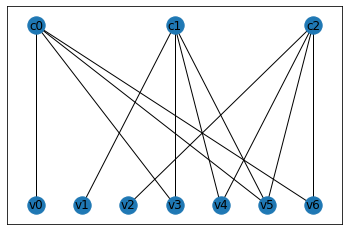

In [5]:
from utils import get_tanner_graph

G, pos = get_tanner_graph(H_4_7)

nx.draw_networkx(G, pos)

In [6]:
from keras.layers import Input
from keras.models import Model

from layers import EvenLayer

In [7]:
inp = Input(shape=(7,))
inp2 = Input(shape=(12,))
out = EvenLayer(G, 'i1')(inp2)
model = Model(inp2, out)

In [10]:
g = tf.random.Generator.from_seed(123)

model.predict(g.normal((1,12)))

array([[-0.5311991 ,  0.6656982 , -0.55857885,  0.5992342 , -0.70715505,
         0.5033201 ,  0.        ,  0.6995375 ,  0.90637326,  0.66981786,
         0.7111727 , -0.        ]], dtype=float32)